In [1]:
# Importing necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Generating 6 x 8 images

#### Grey Scale & Color images


[255 255 100]


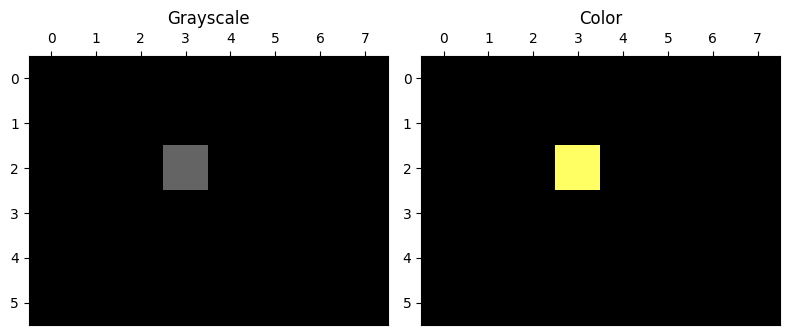

In [23]:
# Create grayscale image
im_grey = np.zeros((6, 8), dtype=np.uint8)
im_grey[2, 3] = 100

# Create color image
im_clr = np.zeros((6, 8, 3), dtype=np.uint8)
im_clr[2, 3] = [255, 255, 100]
print(im_clr[2, 3])

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# Plot grayscale image
axs[0].imshow(im_grey, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Grayscale")
axs[0].xaxis.tick_top()

# Plot color image
axs[1].imshow(im_clr)
axs[1].set_title("Color")
axs[1].xaxis.tick_top()


plt.tight_layout()
plt.show()


### Opening images
#### Using Matplotlib
Since OpenCV uses BGR format and Matplotlib uses RGB format when opening images we need to use `cv.cvtColor()` to convert BGR to RGB

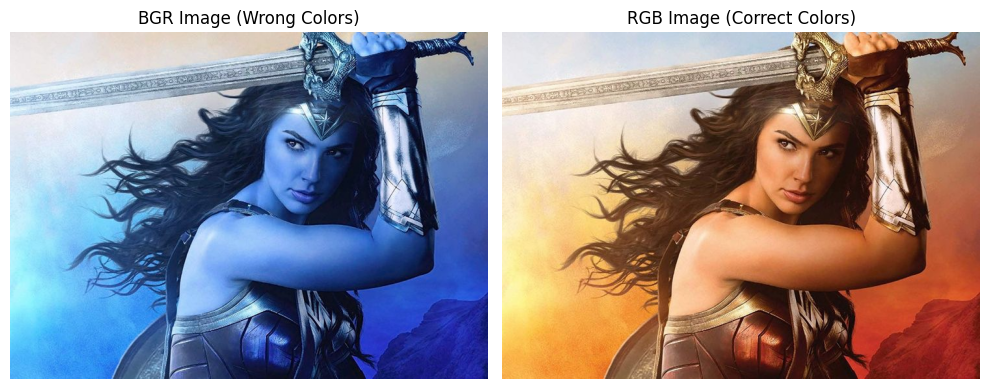

In [3]:
# Load image using OpenCV (BGR format by default)
img_bgr = cv.imread('./images/gal.jpg', cv.IMREAD_COLOR)

# Convert BGR to RGB for correct color display in matplotlib
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Plot side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Without conversion (incorrect colors)
axs[0].imshow(img_bgr)
axs[0].set_title("BGR Image (Wrong Colors)")
axs[0].axis('off')

# With BGR to RGB conversion (correct colors)
axs[1].imshow(img_rgb)
axs[1].set_title("RGB Image (Correct Colors)")
axs[1].axis('off')

plt.tight_layout()
plt.show()


#### Using OpenCV


In [4]:
img_cv = cv.imread('./images/ironman.jpg')
cv.namedWindow("Iron Man Image", cv.WINDOW_NORMAL)
cv.imshow("Iron Man Image", img_cv)
cv.waitKey(0)
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/pankaja/ENTC/Sem5/EN3160_Image_Processing_and_Machine_Vision/cvenv/lib/python3.10/site-packages/cv2/qt/plugins"


### Displaying Image properties

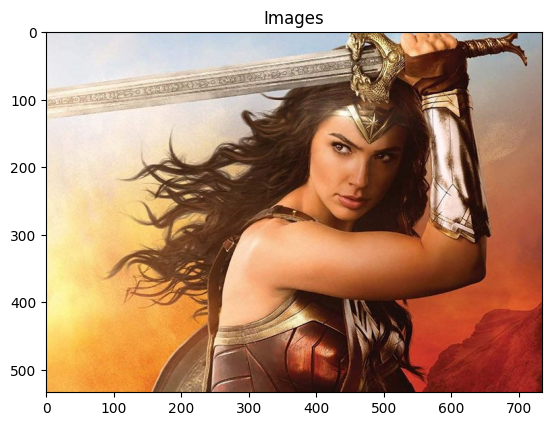

Images Shape: (534, 735, 3)
Image Size: 1177470
Image Data Type: uint8


In [5]:
img = cv.imread('./images/gal.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots()
axs.imshow(img)
axs.set_title("Images")
plt.show()

#Image Properties
print("Images Shape: " + str(img.shape))
print("Image Size: " + str(img.size))
print("Image Data Type: " + str(img.dtype))

### Increasing the brightness using OpenCV

Text(0.5, 1.0, 'cv.add')

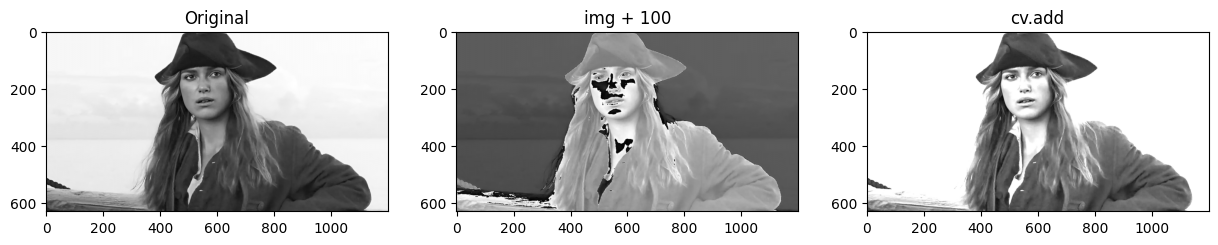

In [6]:
img = cv.imread("./images/keira.jpg", cv.IMREAD_GRAYSCALE)
imgb = img + 100
imgc = cv.add(img, 100)
f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='grey')
ax[0].set_title("Original")

ax[1].imshow(imgb, cmap='grey')
ax[1].set_title("img + 100")

ax[2].imshow(imgc, cmap='grey')
ax[2].set_title("cv.add")



##### ⚠️ Problem with `img + 100`

When working with NumPy arrays of type `uint8` (unsigned 8-bit integer), direct addition can cause overflow issues:

- If you perform `img + 100` and a pixel value is 200:
  ```
  200 + 100 = 300
  ```

- Since `uint8` can only store values from 0-255, values above 255 wrap around:
  ```
  300 - 256 = 44
  ```

This wraparound behavior causes the result to look weird or distorted.

##### ✅ Why `cv.add(img, 100)` is Better

OpenCV's `cv.add()` function uses **saturation arithmetic**:

- When `img[i][j] + 100 > 255`, it clips the value to 255 instead of wrapping around
- This prevents overflow artifacts and results in correct brightness increase
- The image maintains proper visual quality without unexpected dark pixels


### Increasing the Brightness using Loops

In [7]:
# Buggy version for comparison
def old_image_brighten(image, shift):
    h = image.shape[0]
    w = image.shape[1]
    result = np.zeros(image.shape, image.dtype)
    for i in range(0, h):
        for j in range(0, w):
            no_overflow = True if image[i, j] + shift < 255 else False # integer overflow (uint8) before comparison
            result[i, j] = min(image[i, j] + shift , 255) if no_overflow else 255
    return result

# Fixed version
def image_brighten(image, shift):
    h = image.shape[0]
    w = image.shape[1]
    result = np.zeros(image.shape, image.dtype)
    for i in range(h):
        for j in range(w):
            new_val = int(image[i, j]) + shift
            result[i, j] = 255 if new_val > 255 else new_val
    return result


/tmp/ipykernel_5972/139703331.py:8: RuntimeWarning: overflow encountered in scalar add
  no_overflow = True if image[i, j] + shift < 255 else False # integer overflow (uint8) before comparison
/tmp/ipykernel_5972/139703331.py:9: RuntimeWarning: overflow encountered in scalar add
  result[i, j] = min(image[i, j] + shift , 255) if no_overflow else 255


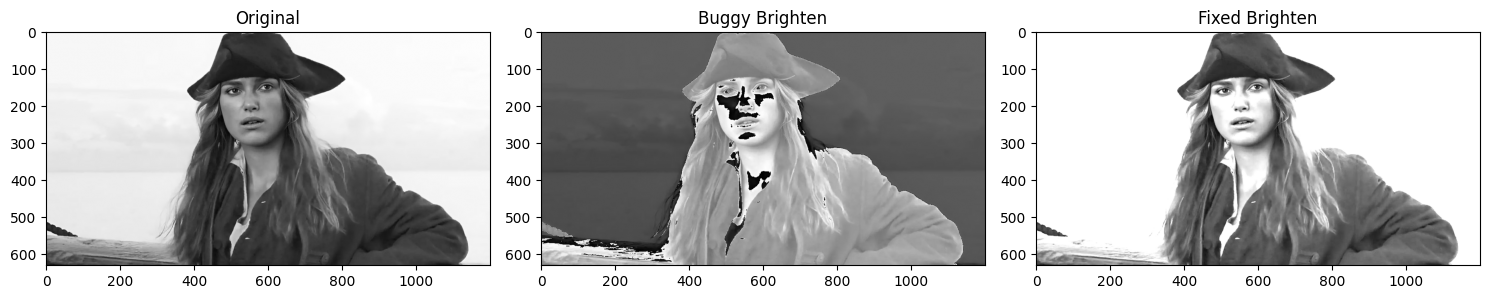

In [8]:
new_img = cv.imread("./images/keira.jpg", cv.IMREAD_GRAYSCALE)

old_bright = old_image_brighten(new_img, 100)
new_bright = image_brighten(new_img, 100)

f, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(new_img, cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(old_bright, cmap='gray')
ax[1].set_title("Buggy Brighten")

ax[2].imshow(new_bright, cmap='gray')
ax[2].set_title("Fixed Brighten")

plt.tight_layout()
plt.show()


#### Zeroing Out Green and Blue Planes

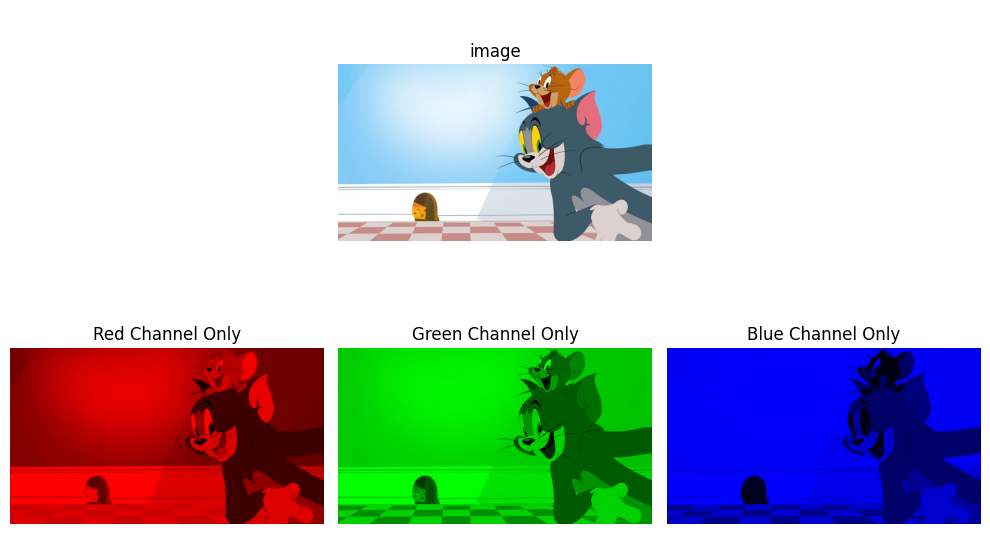

In [9]:
img = cv.imread("./images/tom.jpg", cv.IMREAD_ANYCOLOR)
if img is None:
    print('Image could not be read.')
    assert False

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ax[0, 1].imshow(img)
ax[0, 1].set_title("image")
ax[0, 1].axis('off')

red_img = img.copy()
red_img[:, :, 1:3] = 0
ax[1, 0].imshow(red_img)
ax[1, 0].set_title("Red Channel Only")
ax[1, 0].axis('off')

green_img = img.copy()
green_img[:, :, 0] = 0
green_img[:, :, 2] = 0
ax[1, 1].imshow(green_img)
ax[1, 1].set_title("Green Channel Only")
ax[1, 1].axis('off')

blue_img = img.copy()
blue_img[:, :, 0] = 0
blue_img[:, :, 1] = 0
ax[1, 2].imshow(blue_img)
ax[1, 2].set_title("Blue Channel Only")
ax[1, 2].axis('off')

ax[0, 0].axis('off')
ax[0, 2].axis('off')

plt.tight_layout()
plt.show()


# Intensity Transformations (Point Operations)

The output value of the pixel depends only on the input values of that pixel, not its neighbors.

$$g(x,y) = T[f(x,y)]$$


Where:
- **f(x,y)** = input image pixel intensity at coordinates (x,y)
- **g(x,y)** = output image pixel intensity at coordinates (x,y)
- **T** = transformation function

## Point Operations Characteristics

Point operations have the following key properties:

- Each output pixel depends only on the corresponding input pixel
- The transformation is memoryless (no spatial information used)
- The same transformation function is applied to all pixels
- Computationally efficient and easily parallelizable

## Identity Transform

The **identity transform** is the simplest intensity transformation where the output image is identical to the input image.

$g(x,y) = T[f(x,y)] = f(x,y)$

This means: **Output intensity = Input intensity**

### Properties of Identity Transform

- No change in pixel intensities
- Preserves the original image exactly
- Serves as a baseline for comparing other transformations
- Linear transformation with slope = 1 and intercept = 0

## Graph of Identity Transform

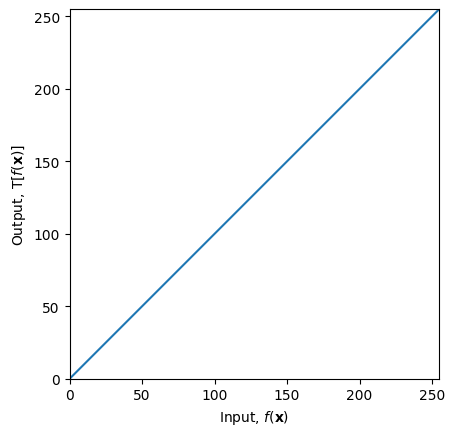

In [16]:
transform = np.arange(0,256).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r"Input, $f(\mathbf{x})$")
ax.set_ylabel(r"Output, $\mathrm{T}[f(\mathbf{x})]$")
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

(608, 1080)


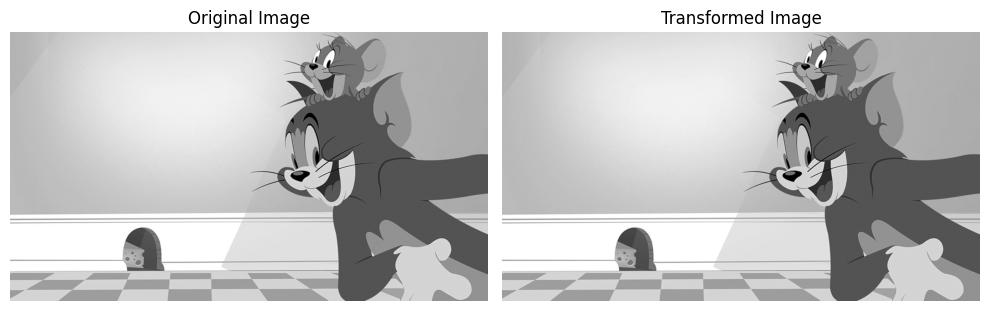

In [ ]:
original_img = cv.imread('./images/tom.jpg', cv.IMREAD_GRAYSCALE)
print(original_img.shape)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', original_img)
cv.waitKey(0)

transformed_img = cv.LUT(original_img, transform)
cv.imshow("Image", transformed_img)
cv.waitKey(0)

cv.destroyAllWindows()

(608, 1080)


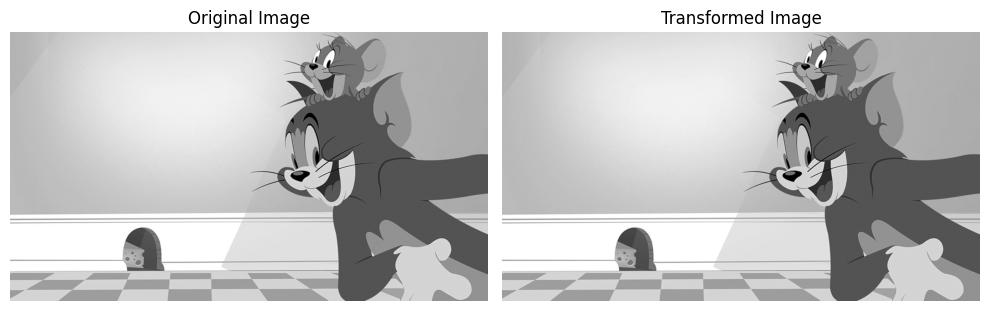

In [19]:
# Load grayscale image
original_img = cv.imread('./images/tom.jpg', cv.IMREAD_GRAYSCALE)
print(original_img.shape)

# Create a sample transform 
transform = np.arange(0, 256).astype('uint8')

# Apply LUT transformation
transformed_img = cv.LUT(original_img, transform)

# Display both images side by side using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transformed_img, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

```python
transformed_img = cv.LUT(original_img, transform)
```

This line applied lookup table (LUT) transformation to the grayscale image.

This can also be done using `NymPy` Only.
```python
transformed_img = transform[original_img]
```


In [20]:
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', original_img)
cv.waitKey(0)

transformed_img = transform[original_img]
cv.imshow("Image", transformed_img)
cv.waitKey(0)

cv.destroyAllWindows()

This is a fast, NumPy-based way to apply a lookup table transformation to an image. Each pixel in original_img is replaced by the value at that pixel's index in transform.

It’s equivalent to cv.LUT(original_img, transform), but doesn't require OpenCV.

### Inverse Transform

$$g(x) = 255 - f(x)$$

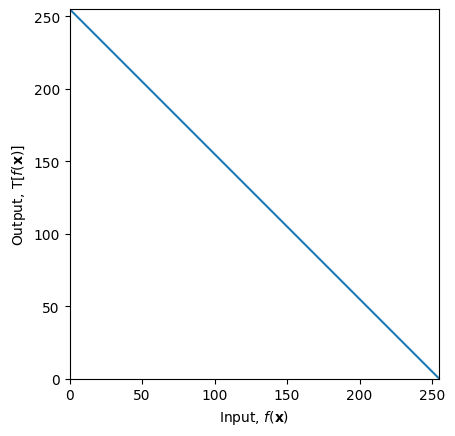

In [21]:
inverse_transform = np.arange(255, -1, -1).astype('uint8')

fig, ax = plt.subplots()
ax.plot(inverse_transform)
ax.set_xlabel(r"Input, $f(\mathbf{x})$")
ax.set_ylabel(r"Output, $\mathrm{T}[f(\mathbf{x})]$")
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('Inverse_transform.png')
plt.show()

In [14]:
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', original_img)
cv.waitKey(0)

inverse_img = cv.LUT(original_img, inverse_transform)
cv.imshow("Image", inverse_img)
cv.waitKey(0)

cv.destroyAllWindows()

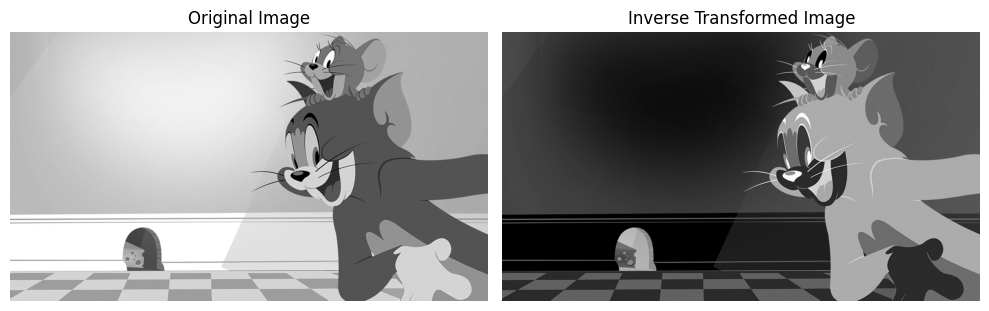

In [22]:
inverse_img = cv.LUT(original_img, inverse_transform)

# Display both images side by side using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(inverse_img, cmap='gray')
ax[1].set_title('Inverse Transformed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

#### Intensity Windowing I

256


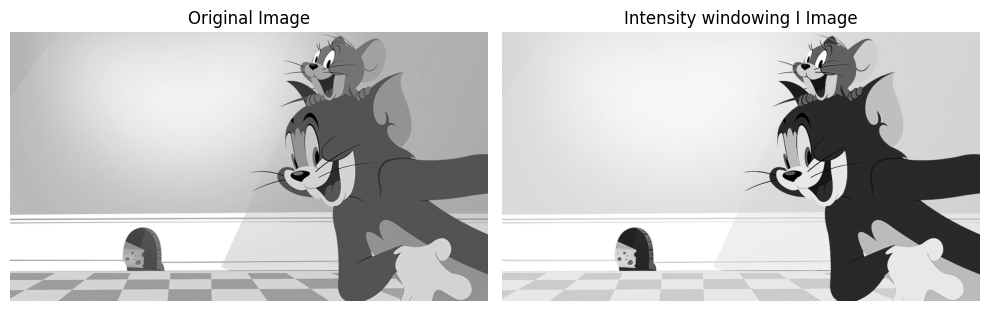

In [26]:
c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 -0).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1, 255, 255 - c[1,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

windowed_img = cv.LUT(original_img, transform)

# Display both images side by side using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original_img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(windowed_img, cmap='gray')
ax[1].set_title('Intensity windowing I Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


# HW Bilinear interpolation